In [1]:
!pip install torch
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [25]:
#2.1 IMAGES Task: 1
import torch
import torchvision
import numpy as np

# Download the MNIST dataset
mnist_dataset = torchvision.datasets.MNIST(root='data/', train=True, transform=torchvision.transforms.ToTensor(), download=True)

# Create a subset of the dataset containing 1000 samples
subset_size = 1000
subset_idx = np.random.choice(len(mnist_dataset), size=subset_size, replace=False)
subset = [mnist_dataset[i] for i in subset_idx]

# Extract the images and labels from the subset
images = [sample[0] for sample in subset]
labels = [sample[1] for sample in subset]


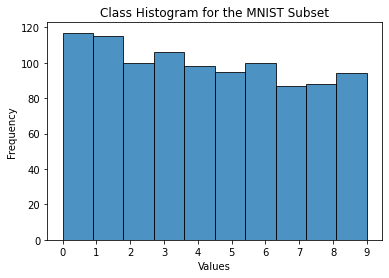

In [19]:
#2.1 IMAGES Task: 2
import matplotlib.pyplot as plt

# Plot the histogram of classes in the subset
plt.hist(labels, bins=10, range=(0, 9), edgecolor='black', alpha=0.8)
plt.xticks(np.arange(0,10))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title("Class Histogram for the MNIST Subset")
plt.show()


In [33]:
#2.1 IMAGES Task: 3
import einops
import torch
import torchvision
import torchvision.transforms as transforms

# Load the MNIST dataset and create a subset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
indices = torch.randperm(len(trainset))[:1000]  # Randomly select 1000 indices
subset_trainset = torch.utils.data.Subset(trainset, indices)

# Convert the images to a tensor
images = torch.stack([img for img, label in subset_trainset])

# Change the dimensions of the images
batch_size = 25
num_samples = images.shape[0]
num_batches = num_samples // batch_size
if num_samples % batch_size != 0:
    num_batches += 1

batched_images = images.view(num_batches, batch_size, *images.shape[1:]).permute(0, 1, 3, 4, 2)

print(f'Batched Images Shape: {batched_images.shape}')  # should be (40, 25, 28, 28, 1)


Batched Images Shape: torch.Size([40, 25, 28, 28, 1])


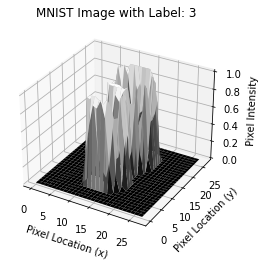

In [40]:
#2.1 IMAGES Task: 4
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

# Load the MNIST dataset and create a subset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
indices = torch.randperm(len(trainset))[:1000]  # Randomly select 1000 indices
subset_trainset = torch.utils.data.Subset(trainset, indices)

# Convert the images to a numpy array
images = np.stack([img.numpy().reshape(-1) for img, label in subset_trainset])
labels = [label for img, label in subset_trainset]

# Select a random image
index = np.random.randint(len(images))
image = images[index].reshape(28, 28)

# Plot the 3D representation of the image
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(np.arange(28), np.arange(28))
ax.plot_surface(x, y, image, cmap='gray')
ax.set_title(f'MNIST Image with Label: {labels[index]}')
ax.set_xlabel('Pixel Location (x)')
ax.set_ylabel('Pixel Location (y)')
ax.set_zlabel('Pixel Intensity')
plt.show()

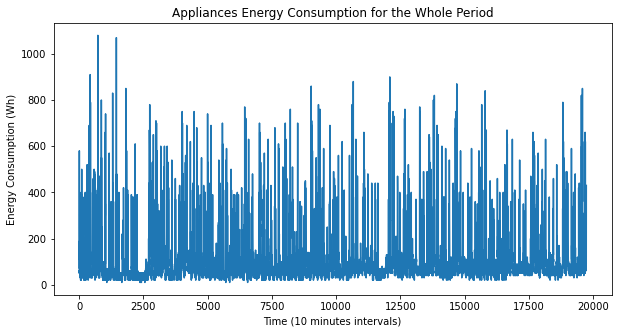

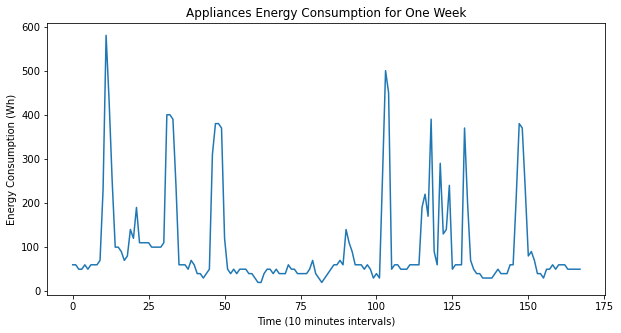

In [43]:
#2.2 TIME SERIES Task: 1
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("energydata_complete.csv")

# Plot the appliances energy consumption for the whole period
plt.figure(figsize=(10,5))
plt.plot(data['Appliances'])
plt.xlabel('Time (10 minutes intervals)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption for the Whole Period')
plt.show()

# Plot the appliances energy consumption for one week
week = data.iloc[0:168]
plt.figure(figsize=(10,5))
plt.plot(week['Appliances'])
plt.xlabel('Time (10 minutes intervals)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption for One Week')
plt.show()


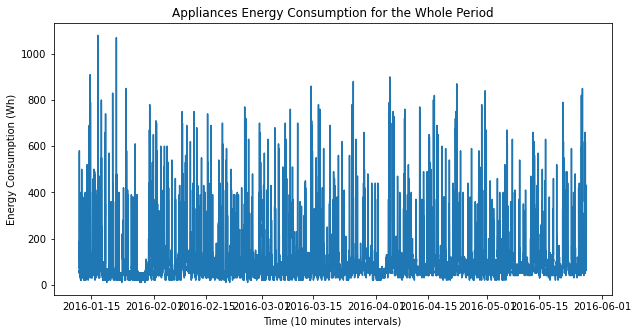

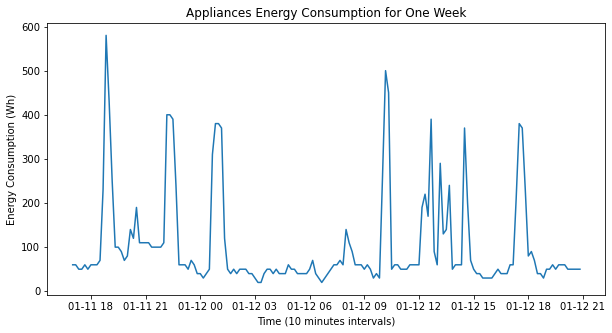

In [48]:
#2.2 TIME SERIES Task: 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("energydata_complete.csv")

# Set the date column as the index and convert it to a DatetimeIndex
data.index = pd.to_datetime(data['date'])

# Plot the appliances energy consumption for the whole period
plt.figure(figsize=(10,5))
plt.plot(data['Appliances'])
plt.xlabel('Time (10 minutes intervals)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption for the Whole Period')
plt.show()

# Plot the appliances energy consumption for one week
week = data.iloc[0:168]
plt.figure(figsize=(10,5))
plt.plot(week['Appliances'])
plt.xlabel('Time (10 minutes intervals)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption for One Week')
plt.show()

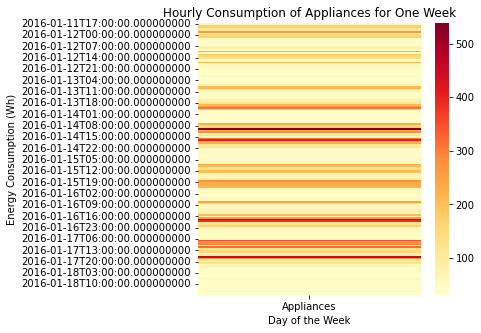

In [65]:
#2.2 TIME SERIES Task: 2
# Resample the data to hourly intervals
hourly_data = data.resample('H').mean()

# Plot the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(hourly_data.iloc[0:168]['Appliances'].to_frame(), cmap='YlOrRd')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Hourly Consumption of Appliances for One Week')
plt.show()

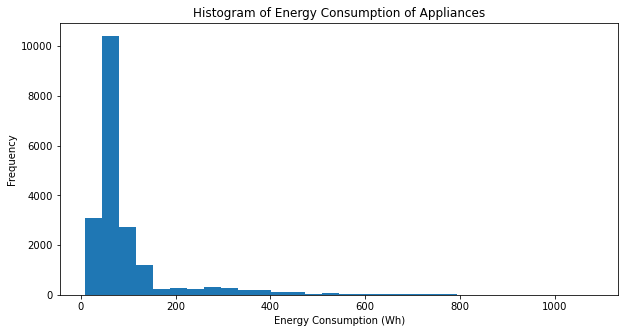

In [49]:
#2.2 TIME SERIES Task: 3
# Plot the histogram
plt.figure(figsize=(10,5))
plt.hist(data['Appliances'], bins=30)
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption of Appliances')
plt.show()

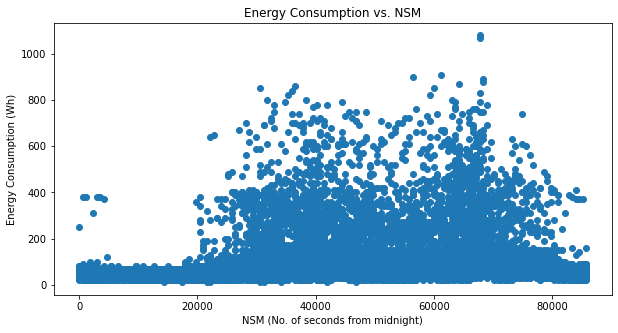

In [50]:
#2.2 TIME SERIES Task: 4
# Create the NSM variable
data['NSM'] = (data.index.hour * 3600) + (data.index.minute * 60) + data.index.second

# Plot the energy consumption vs. NSM
plt.figure(figsize=(10,5))
plt.scatter(data['NSM'], data['Appliances'])
plt.xlabel('NSM (No. of seconds from midnight)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. NSM')
plt.show()

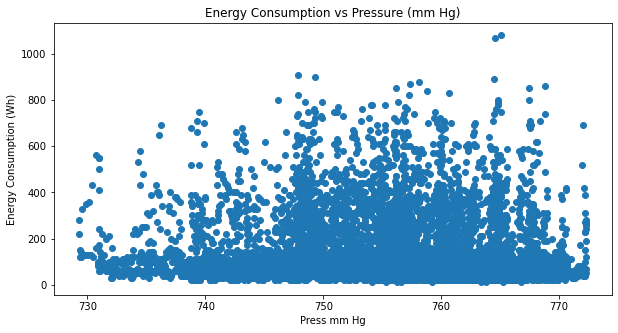

In [51]:
#2.2 TIME SERIES Task: 5
# Plot the energy consumption vs. Press mm Hg
plt.figure(figsize=(10,5))
plt.scatter(data['Press_mm_hg'], data['Appliances'])
plt.xlabel('Press mm Hg')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs Pressure (mm Hg)')
plt.show()

In [53]:
#2.2 TIME SERIES Task: 6
#Commenting on major contributing factors for energy consupmtion 'among all other features' is number
#of seconds from midnight (NSM) and Press_mm_Hg.

#Possible reasoning for this:


In [86]:
#2.3 MULTI-VARIATE NOTE: This will be broken down in one cell since simpler to compute
import pandas as pd
import numpy as np

columns = ['Frequency (Hz)', 'Angle of Attack (deg)', 'Chord Length (m)', 'Free-stream velocity (m/s)', 
           'Suction side displacement thickness (m)', 'Scaled sound pressure level (dB)']

# Open the .dat file and read the data into a pandas DataFrame
with open("airfoil_self_noise.dat") as f:
    df = pd.read_csv(f, sep='\s+', header=None, names=columns)

#Task: 1 - Mean
mean = df.mean()
print("\n\033[1m\033[4mMean\033[0m\033[0m")
print(mean)

#Task: 2 - Variance (or Standard Deviation)
variance = df.var()
#std = np.sqrt(variance)
print("\n\033[1m\033[4mVariance\033[0m\033[0m")
print(variance)
#print("Standard Deviation")
#print(std)

#Task: 3 - Median
median = df.median()
print("\n\033[1m\033[4mMedian\033[0m\033[0m")
print(median)

#Task: 4 - Kurtosis
kurtosis = df.kurtosis()
print("\n\033[1m\033[4mKurtosis\033[0m\033[0m")
print(kurtosis)

#Task: 5 - Skewness
skewness = df.skew()
print("\n\033[1m\033[4mSkewness\033[0m\033[0m")
print(skewness)

#Task: 6 - Range
range = df.max() - df.min()
print("\n\033[1m\033[4mRange\033[0m\033[0m")
print(range)



Mean
Frequency (Hz)                             2886.380572
Angle of Attack (deg)                         6.782302
Chord Length (m)                              0.136548
Free-stream velocity (m/s)                   50.860745
Suction side displacement thickness (m)       0.011140
Scaled sound pressure level (dB)            124.835943
dtype: float64

Variance
Frequency (Hz)                             9.938717e+06
Angle of Attack (deg)                      3.502424e+01
Chord Length (m)                           8.749868e-03
Free-stream velocity (m/s)                 2.425116e+02
Suction side displacement thickness (m)    1.729287e-04
Scaled sound pressure level (dB)           4.759146e+01
dtype: float64

Median
Frequency (Hz)                             1600.000000
Angle of Attack (deg)                         5.400000
Chord Length (m)                              0.101600
Free-stream velocity (m/s)                   39.600000
Suction side displacement thickness (m)       0.004957
Scale